In [330]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler






In [331]:

def generateTestFunction():
    f1 = 0.5;
    f3 = 0.2;

    x = np.arange(start= 0, stop = 10, step= 0.001);

    #y1 = np.cos(x.dot(f1*2*np.pi)).dot(0);
    #y2 = np.cos(x.dot(f3*2*np.pi)).dot(0);
    y3 = np.multiply(x, x);
    #yres = np.add(y1, y2);
    #yres = np.add(yres, y3);
    yres = y3;
    npResult = np.array([x, yres]);

    return npResult.transpose();






In [259]:


#gen = generateTestFunction();
#input = gen[0:, 0:1];
#output = gen[0:, 1:2];
#input.shape[]
#train_test_split()

In [151]:
seq = np.arange(start = 0, stop = 10000, step = 1);
#seq10x = seq.dot(10);
splitted_seq_train, splitted_seq_test = train_test_split(seq, train_size=0.7 , shuffle= False, random_state = 2);
#s = train_test_split(seq, seq10x, train_size=0.5 , shuffle= True, random_state = 0);
splitted_seq_train.shape[:]

(7000,)

In [332]:
ss = StandardScaler();

gen = generateTestFunction();
input = gen[0:, 0:1];
output = gen[0:, 1:2];

x_train_set_full, x_test, y_train_set_full, y_test  = train_test_split(input, output, 
train_size=0.75 , shuffle= False, random_state = 0);

x_train, x_val, y_train, y_val = train_test_split(x_train_set_full, y_train_set_full, 
train_size=0.8 , shuffle= False, random_state = 0);

#print(x_test.shape[:])
#print(x_train.shape[:])
#Sprint(x_val.shape[:])

x_train_normalized = ss.fit_transform(x_train);
x_test_normalized = ss.fit_transform(x_test);
x_val_normalized = ss.fit_transform(x_val);


mlp0 = keras.Sequential();
mlp0.add(keras.layers.Dense(10, activation='sigmoid' , input_shape = x_train_normalized.shape[1:]));
mlp0.add(keras.layers.Dense(1));

#keras.activations.

mlp0.summary();
keras.utils.plot_model(mlp0);

#mlp0.compile(loss = 'mean_squared_error', optimizer = 'sgd');


Model: "sequential_75"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_267 (Dense)           (None, 10)                20        
                                                                 
 dense_268 (Dense)           (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [333]:
mlp0.compile(loss = 'mean_squared_error');

In [334]:
history = mlp0.fit(x_train, y_train, epochs = 120, validation_split = 0.001);

Epoch 1/120
188/188 [==============================] - 2s 6ms/step - loss: 225.4589 - val_loss: 1135.9486
Epoch 2/120
188/188 [==============================] - 1s 4ms/step - loss: 187.9362 - val_loss: 990.0538
Epoch 3/120
188/188 [==============================] - 1s 4ms/step - loss: 152.3730 - val_loss: 844.7026
Epoch 4/120
188/188 [==============================] - 1s 4ms/step - loss: 124.5898 - val_loss: 724.7726
Epoch 5/120
188/188 [==============================] - 1s 4ms/step - loss: 105.2533 - val_loss: 631.3931
Epoch 6/120
188/188 [==============================] - 1s 4ms/step - loss: 92.1870 - val_loss: 560.0230
Epoch 7/120
188/188 [==============================] - 1s 5ms/step - loss: 82.5032 - val_loss: 504.3935
Epoch 8/120
188/188 [==============================] - 1s 5ms/step - loss: 74.4735 - val_loss: 457.2541
Epoch 9/120
188/188 [==============================] - 1s 4ms/step - loss: 66.9514 - val_loss: 415.8477
Epoch 10/120
188/188 [==============================] - 1s

[[0.0000000e+00]
 [1.0000000e-06]
 [4.0000000e-06]
 ...
 [3.5964009e+01]
 [3.5976004e+01]
 [3.5988001e+01]]
188/188 [==============================] - 1s 3ms/step
[[-0.3458886 ]
 [-0.34493065]
 [-0.3439722 ]
 ...
 [35.43277   ]
 [35.44324   ]
 [35.453712  ]]
188/188 [==============================] - 1s 3ms/step


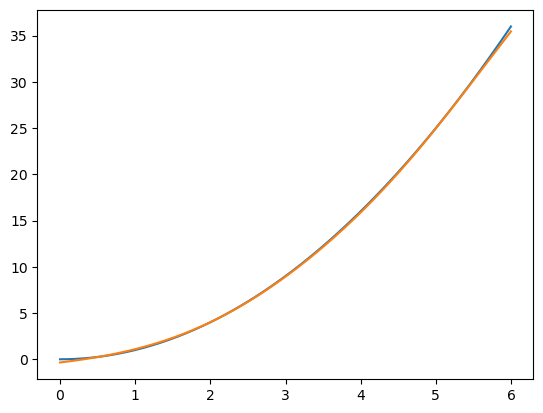

In [335]:
#plt.plot(history.history['loss'])
#mlp0.layers
print(y_train);
print(mlp0.predict(x_train));
#mlp0.layers[3].get_weights()
plt.plot(x_train, y_train)
plt.plot(x_train, mlp0.predict(x_train))
#plt.plot(x_train, mlp0.predict(x_train))

In [329]:
mlp0.layers[0].get_weights()

[array([[ 1.1923727 , -0.00874412, -0.2639614 , -0.5797969 , -0.08591712,
         -0.5661041 , -0.27742282,  0.03449255,  0.0509114 ,  2.2263498 ]],
       dtype=float32),
 array([-4.28542   ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        , -0.20765509, -0.3272121 , -2.6527328 ],
       dtype=float32)]